In [15]:
from numpy.lib.function_base import interp

# from yudai.fso_link import *
from yudai.fso_link_muy_sigma_change import *

In [16]:
channel = AtmosphericChannel(tau_zen=0.75)

In [17]:
def EQ_muy(eta,p_dark, P_AP, e_0, e_pol, n_s):
    p_dark_new = p_dark*(1+P_AP)
    EQ_muy = e_0 * p_dark_new + (e_pol + e_0*P_AP)*(1-np.exp((-n_s*eta)))
    return EQ_muy
def Q_muy(eta, p_dark, P_AP, n_s):
    p_dark_new = p_dark*(1+P_AP)
    Q_muy = p_dark_new + (1+P_AP)*(1-np.exp((-n_s*eta)))
    return Q_muy


In [18]:
from scipy import integrate
import numpy as np
def qber_cal(p_dark, P_AP, e_0, e_pol, n_s, zenith):
    phi_mod, A_mod, eta_l, mu, sigma_R = channel.prepare_parameters(zenith = zenith)
    def numerator(eta):
        return EQ_muy(eta, p_dark, P_AP, e_0, e_pol, n_s) * channel.f_eta(eta, phi_mod, A_mod, eta_l, mu, sigma_R)
    def denominator(eta):
        return Q_muy(eta, p_dark, P_AP, n_s) * channel.f_eta(eta, phi_mod, A_mod, eta_l, mu, sigma_R)

    denominator_inter,_ = integrate.quad(denominator, 0, np.inf,limit=1000)
    numerator_inter,_ = integrate.quad(numerator, 0, np.inf,limit=1000)
    return numerator_inter/denominator_inter, numerator_inter

In [19]:
p_dark = 1e-4
P_AP = 0.02
e_0 = 0.5
e_pol = 0.01
n_s = 0.5

In [20]:
array = np.linspace(-60, 60, 20)


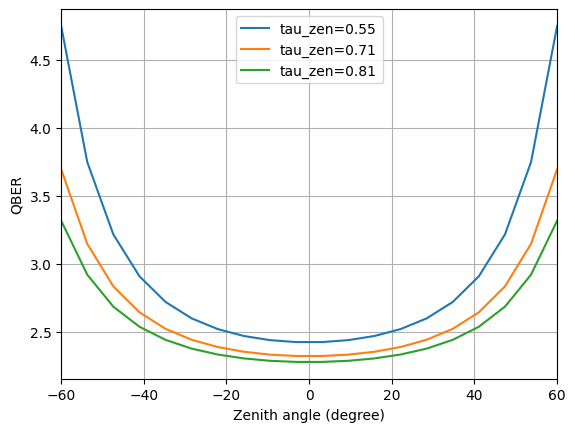

In [21]:
tau_zen_list = [0.55, 0.71, 0.81]

for tau in tau_zen_list:
    channel = AtmosphericChannel(tau_zen=tau, H_source=500e3)
    qber_arr = []
    for angle in array:
        qber,_ = qber_cal(p_dark, P_AP, e_0, e_pol, n_s, angle)
        qber_arr.append(qber*100)
    # Sau mỗi vòng lặp có thể vẽ QBER theo góc cho từng tau_zen
    plt.plot(array, qber_arr, label=f"tau_zen={tau}")

plt.xlabel("Zenith angle (degree)")
plt.ylabel("QBER")
plt.legend()
plt.grid()
plt.xlim(-60, 60)
plt.show()
